In [323]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sb

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False 


from mpl_toolkits import mplot3d
%matplotlib inline

# A2M6 vary Tau

In [55]:
A, M = 2, 6
FileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A'+str(A)+'M'+str(M)
add1 = FileAdd + 'tauSimSingle.csv'
add2 = FileAdd + 'tauOdeSingle.csv'

In [56]:
pd1 = pd.read_csv(add1, index_col = 0)
pd2 = pd.read_csv(add2, index_col = 0)

In [57]:
pd1.head()

,n,ns,l,ls,i,is,epi,smt,para
0,0.656364,0.036644,0.423186,0.034791,0.879047,0.012191,0,0.2,0.2
1,0.743469,0.017138,0.363944,0.015404,0.857567,0.006130,0,0.3,0.3
2,0.793601,0.007400,0.336307,0.020266,0.852550,0.011620,0,0.4,0.4
3,0.830488,0.011143,0.330451,0.013896,0.853388,0.006318,0,0.5,0.5
4,0.853283,0.006513,0.319176,0.021798,0.852274,0.008474,0,0.6,0.6


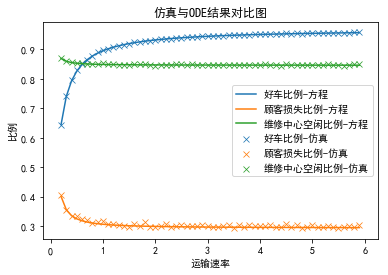

In [69]:
df1 = pd1[pd1.para<6].groupby('para').mean()
df2 = pd2[pd2.para<6].groupby('para').mean()
for f in ['n', 'l', 'i']:
    sb.scatterplot(df1.index, df1[f], marker = 'x')
    plt.plot(df2.index, df2[f])
plt.ylabel('比例')
plt.xlabel('运输速率')
plt.title('仿真与ODE结果对比图')
plt.legend(['好车比例-方程', '顾客损失比例-方程','维修中心空闲比例-方程','好车比例-仿真','顾客损失比例-仿真',
           '维修中心空闲比例-仿真',
           ])
plt.savefig(FileAdd+'仿真-odeSingleVaryTau.png', dpi=150, bbox_inches='tight')

# A2M6 vary N

In [118]:
A, M = 2, 6
FileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A'+str(A)+'M'+str(M)
add1 = FileAdd + 'NSim.csv'
add2 = FileAdd + 'NOde.csv'

In [119]:
pd1 = pd.read_csv(add1, index_col = 0)
pd2 = pd.read_csv(add2, index_col = 0)

In [114]:
pd1.groupby(['para']).mean()

,n,ns,l,ls,i,is,epi,smt
para,,,,,,,,
1,0.644541,0.000200,0.674845,0.000040,0.464954,0.000439,99.5,1.0
2,0.697371,0.000146,0.651146,0.000038,0.573480,0.000311,99.5,2.0
3,0.703762,0.000156,0.648444,0.000037,0.583885,0.000314,99.5,3.0
4,0.704469,0.000148,0.647986,0.000038,0.584986,0.000313,99.5,4.0
5,0.704554,0.000146,0.648063,0.000038,0.585227,0.000316,99.5,5.0
6,0.704362,0.000138,0.647983,0.000040,0.584584,0.000315,99.5,6.0


In [121]:
pd2.groupby(['para']).mean()

,n,l,i,epi,smt
para,,,,,
1,0.644503,0.674785,0.465062,2,1
2,0.697294,0.651283,0.573328,2,2
3,0.703809,0.648324,0.584095,2,3
4,0.704381,0.648059,0.584833,2,4
5,0.704435,0.648033,0.584888,2,5
6,0.704439,0.648031,0.584891,2,6
7,0.704439,0.648031,0.584891,2,7
8,0.704439,0.648031,0.584891,2,8


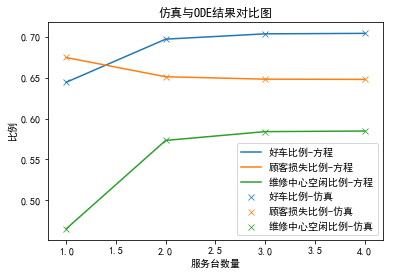

In [302]:
df1 = pd1[pd1.para<=4].groupby('para').mean()
df2 = pd2[pd2.para<=4].groupby('para').mean()
for f in ['n', 'l', 'i']:
    sb.scatterplot(df1.index, df1[f], marker = 'x')
    plt.plot(df2.index, df2[f])
plt.ylabel('比例')
plt.xlabel('服务台数量')
plt.title('仿真与ODE结果对比图')
plt.legend(['好车比例-方程', '顾客损失比例-方程','维修中心空闲比例-方程','好车比例-仿真','顾客损失比例-仿真',
           '维修中心空闲比例-仿真',
           ])
plt.savefig(FileAdd+'仿真-odeSingleVaryN.png', dpi=150, bbox_inches='tight')

# A2M6 ranking and selection validation

In [305]:
A, M = 2,6
fileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A2M6NSim.csv'
df = pd.read_csv(fileAdd).drop(['Unnamed: 0'], axis=1)
df.head()

,n,ns,l,ls,i,is,epi,smt,para
0,0.640902,0.000159,0.674245,0.000035,0.462818,0.000370,0,1,1
1,0.700110,0.000142,0.649668,0.000039,0.571951,0.000305,0,2,2
2,0.643099,0.000144,0.676310,0.000027,0.466475,0.000416,1,1,1
3,0.698859,0.000108,0.650063,0.000031,0.572832,0.000238,1,2,2
4,0.639741,0.000227,0.677797,0.000057,0.456665,0.000474,2,1,1


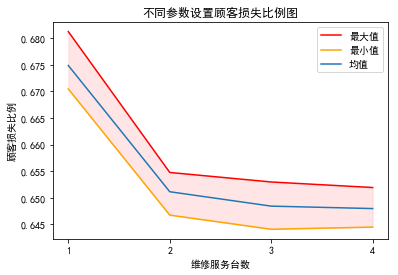

In [309]:
df = df[df.para<5]
mean = df.groupby(['smt', 'para'], as_index=False).mean()
std = df.groupby(['smt', 'para'], as_index=False).std()
_min = df.groupby(['smt', 'para'], as_index=False).min()
_max = df.groupby(['smt', 'para'], as_index=False).max()
plt.plot(_max.smt, _max.l, c='r')
plt.plot(_min.smt, _min.l, c='orange')
plt.plot(mean.smt, mean.l)
plt.legend(['最大值', '最小值', '均值'])
plt.fill_between(mean.smt, _max.l, _min.l, alpha=0.1, color='r')
plt.title('不同参数设置顾客损失比例图')
plt.xlabel('维修服务台数')
plt.xticks([1,2,3,4])
plt.ylabel('顾客损失比例')
plt.savefig('C:\\Rebalancing\\2020-8-31\\result\\A'+str(A)+'M'+str(M)+'RS验证图.png',dpi=150)

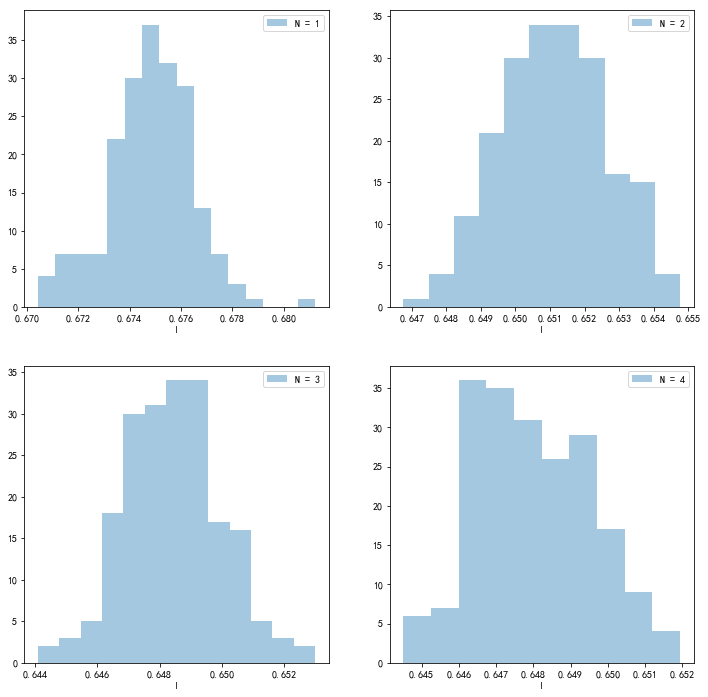

In [123]:
plt.subplots(2,2,figsize=(12,12))
plt.title('不同参数设置损失比例频数统计图')
plt.xlabel('顾客损失比例')
plt.ylabel('频数统计')
for i in range(1,5,1):
    plt.subplot(2, 2,i)
    sb.distplot(df[df.smt==i].l, kde=False)
    plt.legend(['N = '+str(i)])


# A2M6 vary VN

In [289]:
A, M = 2,6
fileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A2M6VN.csv'
df = pd.read_csv(fileAdd).drop(['Unnamed: 0'], axis=1)
df.head()

,l,ls,epi,smt,para
0,0.440788,0.000138,0,1,1
1,0.424453,0.000114,0,1,2
2,0.419267,0.000171,0,1,3
3,0.414403,0.000110,0,1,4
4,0.406862,0.000146,0,1,5


In [290]:
data = df.groupby(['smt','para'], as_index=False).mean()[['smt', 'para','l']]

Text(0.5, 0, '顾客损失比例')

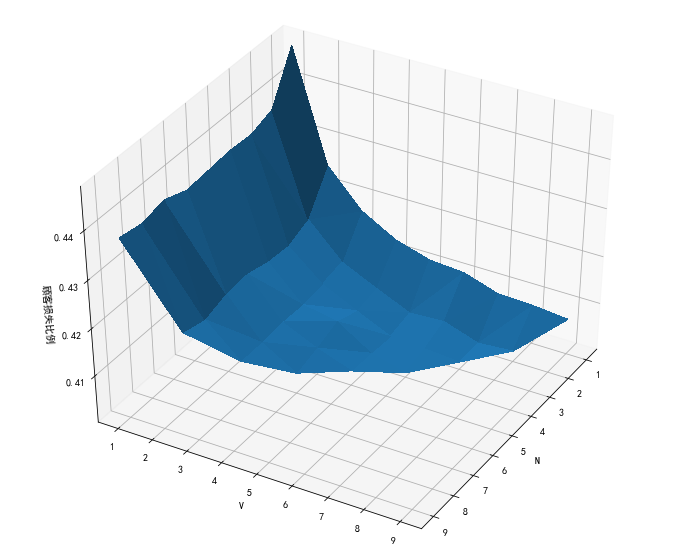

<Figure size 3000x2000 with 0 Axes>

In [303]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
plt.figure(dpi=500)


X = data.smt.values
Y = data.para.values
Z = data.l.values

ax.plot_trisurf(X, Y, Z, edgecolor='none',linewidth=0, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('N')
ax.set_ylabel('V')
ax.set_zlabel('顾客损失比例')

# A2M6 vary VN

In [315]:
A, M = 2,6
fileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A2M6VNSeed3.csv'
df = pd.read_csv(fileAdd).drop(['Unnamed: 0'], axis=1)
df.head()

,l,ls,epi,smt,para
0,0.563386,0.000051,0,1,1
1,0.507158,0.000105,0,1,2
2,0.486975,0.000048,0,1,3
3,0.482764,0.000100,0,1,4
4,0.470226,0.000078,0,1,5


In [316]:
data = df.groupby(['smt','para'], as_index=False).mean()[['smt', 'para','l']]

In [317]:
data

,smt,para,l
0,1,1,0.563341
1,1,2,0.510697
2,1,3,0.490120
3,1,4,0.478658
4,1,5,0.470869
5,1,6,0.465854
6,1,7,0.462896
7,1,8,0.459790
8,1,9,0.458347
9,2,1,0.535494


Text(0.5, 0, '顾客损失比例')

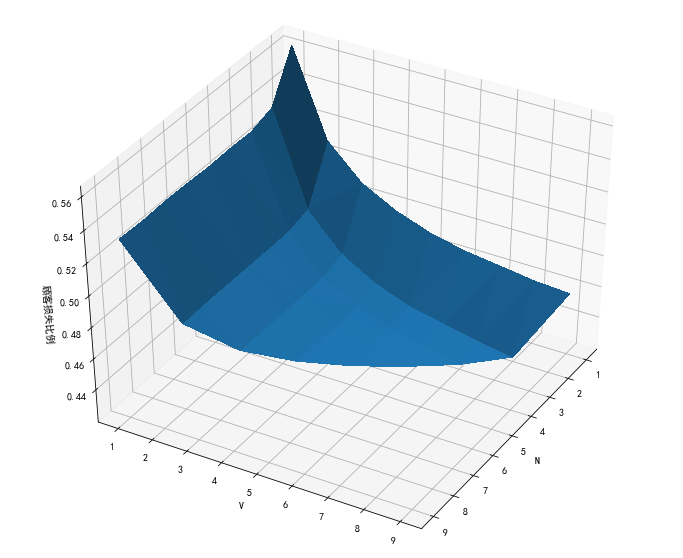

<Figure size 3000x2000 with 0 Axes>

In [318]:

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
plt.figure(dpi=500)


X = data.smt.values
Y = data.para.values
Z = data.l.values

ax.plot_trisurf(X, Y, Z, edgecolor='none',linewidth=0, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('N')
ax.set_ylabel('V')
ax.set_zlabel('顾客损失比例')

# A10 M100

In [321]:
#A, M = 2,6
fileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A10M100VNSeed3.csv'
df = pd.read_csv(fileAdd).drop(['Unnamed: 0'], axis=1)
df.head()
data = df.groupby(['smt','para'], as_index=False).mean()[['smt', 'para','l']]

Text(0.5, 0, '顾客损失比例')

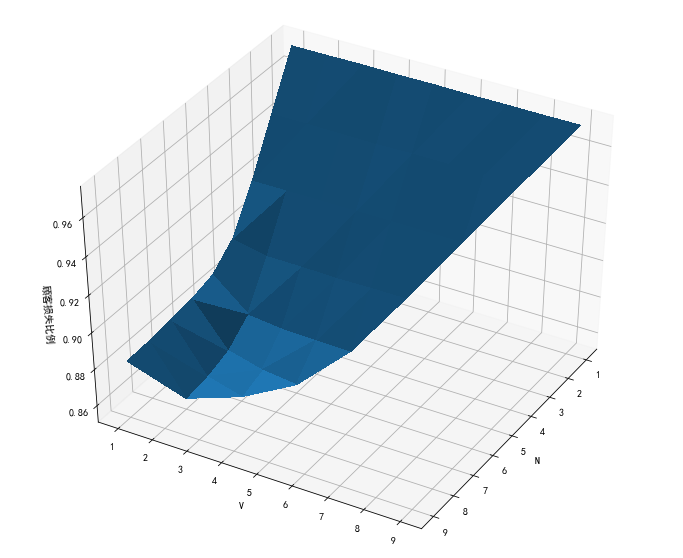

<Figure size 3000x2000 with 0 Axes>

In [322]:

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
plt.figure(dpi=500)


X = data.smt.values
Y = data.para.values
Z = data.l.values

ax.plot_trisurf(X, Y, Z, edgecolor='none',linewidth=0, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('N')
ax.set_ylabel('V')
ax.set_zlabel('顾客损失比例')